In [1]:
import datetime
from math import sqrt

import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from domus_analytica.config import DomusSettings
from domus_analytica.data_clean import extract_info_to_table

config = DomusSettings(_env_file=".env.local")

# Extract Data and Preprocessing 

In [2]:
raw_df = extract_info_to_table(
    config,
    {'search_time': datetime.datetime(2024, 4, 1, 14, 46, 31, 449000)}
)
raw_df.head()

,id,name,address,price,exclusive_area,common_area,completion_date,layout_main,layout_storage_room,direction,...,population_estimation_mean,population_estimation_median,bus_stops_distance_min,bus_stop_count,bus_route_count,monthly_fee_manage,monthly_fee_repair,monthly_fee_repair_fund,monthly_fee_others,monthly_fee_total
0,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7437...,モントーレブルー・ラ・メール Fukuoka,福岡県福岡市東区西戸崎２-1-30,2080.0,57.25,11.04,2007-01-01,2LDK,0,南,...,245.933333,187.0,0.537285,4,9,7800.0,3400.0,0,800.0,12000.0
1,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7460...,ファーネスト箱崎公園,福岡県福岡市東区松田２,2080.0,69.85,38.10,2008-06-01,3LDK,0,北西,...,532.790698,482.0,0.213658,14,66,7600.0,9100.0,0,0.0,16700.0
2,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7250...,Asobi+ JGMヴェルデ香椎南弐番館,福岡県福岡市東区八田１,2490.0,93.33,24.55,2001-06-01,4LDK,0,南東,...,480.627907,537.0,0.138647,19,150,7500.0,14900.0,0,0.0,22400.0
3,/ms/chuko/fukuoka/sc_fukuokashiminami/nc_73552...,エイルヴィラクレアテュール井尻南II,福岡県福岡市南区曰佐２,2580.0,75.42,20.88,1999-05-01,3LDK,0,南西,...,707.708333,641.0,0.158208,36,65,7430.0,8300.0,0,0.0,15730.0
4,/ms/chuko/fukuoka/sc_fukuokashihakata/nc_74582...,アンピール吉塚,福岡県福岡市博多区吉塚６,2780.0,65.10,14.00,2000-11-01,3LDK,0,南東,...,792.020833,874.5,0.221607,21,166,5200.0,6840.0,0,0.0,12040.0


In [3]:
def data_preprocessing(data: pd.DataFrame):
    # Data preprocessing
    data["unit_price"] = data["price"] / data["exclusive_area"]
    data["completion_date_number"] = (
            pd.to_datetime(data["completion_date"]).astype(int)
            / (10 ** 9 * (24 * 60 * 60) * 365.25)
            + 1970
    )
    data["bus_route_pre_stop"] = data["bus_route_count"] / (data["bus_stop_count"] + 0.01)
    data["floor_ratio"] = data["floor"] * 1.0 / data["total_floors"]

    def direction_mapping(s: str) -> str:
        return s.replace("東", "E").replace("南", "S").replace("西", "W").replace("北", "N")

    data["direction"] = data["direction"].map(direction_mapping)
    
    data = pd.get_dummies(data, columns=["direction"], dtype="float32")
    data = pd.get_dummies(data, columns=["layout_main"], dtype="float32")
    data = pd.get_dummies(data, columns=["build_type"], dtype="float32")

    return data


df = data_preprocessing(raw_df)
df.head().transpose()

,0,1,2,3,4
id,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7437...,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7460...,/ms/chuko/fukuoka/sc_fukuokashihigashi/nc_7250...,/ms/chuko/fukuoka/sc_fukuokashiminami/nc_73552...,/ms/chuko/fukuoka/sc_fukuokashihakata/nc_74582...
name,モントーレブルー・ラ・メール Fukuoka,ファーネスト箱崎公園,Asobi+ JGMヴェルデ香椎南弐番館,エイルヴィラクレアテュール井尻南II,アンピール吉塚
address,福岡県福岡市東区西戸崎２-1-30,福岡県福岡市東区松田２,福岡県福岡市東区八田１,福岡県福岡市南区曰佐２,福岡県福岡市博多区吉塚６
price,2080.0,2080.0,2490.0,2580.0,2780.0
exclusive_area,57.25,69.85,93.33,75.42,65.1
common_area,11.04,38.1,24.55,20.88,14.0
completion_date,2007-01-01,2008-06-01,2001-06-01,1999-05-01,2000-11-01
layout_storage_room,0,0,0,0,0
pet,False,False,False,False,False
floor,10,7,2,5,3


# Train XGB model to predict unit price

In [4]:
from itertools import chain

import pandas as pd

feature_prefixes = ["direction_", "layout_main_", "build_type_"]
features = list(set(chain(

    [
        # GIS data from MongoDB
        "nearest_station_distance",
        "nearest_station_passengers",
        "nearest_station_covid_ratio",
        "population_estimation_mean",
        "population_estimation_median",
        "bus_stop_count",
        "bus_route_count",
        "bus_stops_distance_min",
        "bus_route_pre_stop",
        # "min_distance_to_mafia",
        "min_distance_to_cemetery",
    ],
    [
        "floor",
        "total_floors",
        "floor_ratio",
        "common_area",
        "layout_storage_room",
        "exclusive_area",
        "completion_date_number",
        "monthly_fee_total",
    ],
    *(
        [col for col in df.columns if col.startswith(feature_prefix)]
        for feature_prefix in feature_prefixes
    )
)))
target = "unit_price"

print("Using features: {} to predict {}".format(",".join(features), target))

test_ratio = 0.1
val_ratio = 0.1
random_state = 123
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=test_ratio, random_state=random_state
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=(val_ratio / (1 - test_ratio)), random_state=random_state
)

Using features: direction_SE,floor,direction_E,nearest_station_distance,layout_main_3LDK,direction_N,direction_NW,monthly_fee_total,floor_ratio,common_area,completion_date_number,build_type_wood,layout_storage_room,direction_SW,build_type_unknown,bus_route_pre_stop,population_estimation_mean,bus_stop_count,direction_W,direction_NE,layout_main_4LDK,nearest_station_passengers,direction_S,min_distance_to_cemetery,bus_route_count,layout_main_2DK,layout_main_2LDK,exclusive_area,population_estimation_median,total_floors,nearest_station_covid_ratio,bus_stops_distance_min,layout_main_3LK,build_type_RC to predict unit_price


In [7]:
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=6, max_depth=7, objective="reg:squarederror", eval_metric="rmse")
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
print(
    f"R-Square: Train={model.score(X_train, y_train)}, test={model.score(X_test, y_test)}"
)
print(
    f"単価のRMSE (万円): Train={sqrt(mean_squared_error(model.predict(X_train), y_train))}, test={sqrt(mean_squared_error(model.predict(X_test), y_test))}"
)

total_rmse_train = sqrt(
    mean_squared_error(
        model.predict(X_train) * X_train["exclusive_area"],
        y_train * X_train["exclusive_area"],
    )
)
total_rmse_test = sqrt(
    mean_squared_error(
        model.predict(X_test) * X_test["exclusive_area"],
        y_test * X_test["exclusive_area"],
    )
)
total_mape_train = mean_absolute_percentage_error(
       model.predict(X_train) * X_train["exclusive_area"],
        y_train * X_train["exclusive_area"],
)
total_mape_test = mean_absolute_percentage_error(
        model.predict(X_test) * X_test["exclusive_area"],
        y_test * X_test["exclusive_area"],
)
print(f"総金額のRMSE (万円): Train={total_rmse_train}, test={total_rmse_test}")
print(f"総金額のMAPE (%): Train={total_mape_train}, test={total_mape_test}")
df["unit_price_estimate"] = model.predict(df[features])
df["price_estimate"] = df["unit_price_estimate"] * df["exclusive_area"]
pd.DataFrame(
    zip(features, model.feature_importances_),
    columns=["features", "importances"],
    
).sort_values(by="importances", ascending=False)

R-Square: Train=0.9488523632072937, test=0.8365364429834243
単価のRMSE (万円): Train=3.8655396598569625, test=6.285288464214588
総金額のRMSE (万円): Train=309.3251309317459, test=556.359905476559
総金額のMAPE (%): Train=0.05228986355814251, test=0.08374528105294661


,features,importances
24,bus_route_count,0.480366
10,completion_date_number,0.168712
21,nearest_station_passengers,0.049365
23,min_distance_to_cemetery,0.029913
3,nearest_station_distance,0.029356
26,layout_main_2LDK,0.026600
11,build_type_wood,0.021144
30,nearest_station_covid_ratio,0.020739
16,population_estimation_mean,0.019689
15,bus_route_pre_stop,0.019626


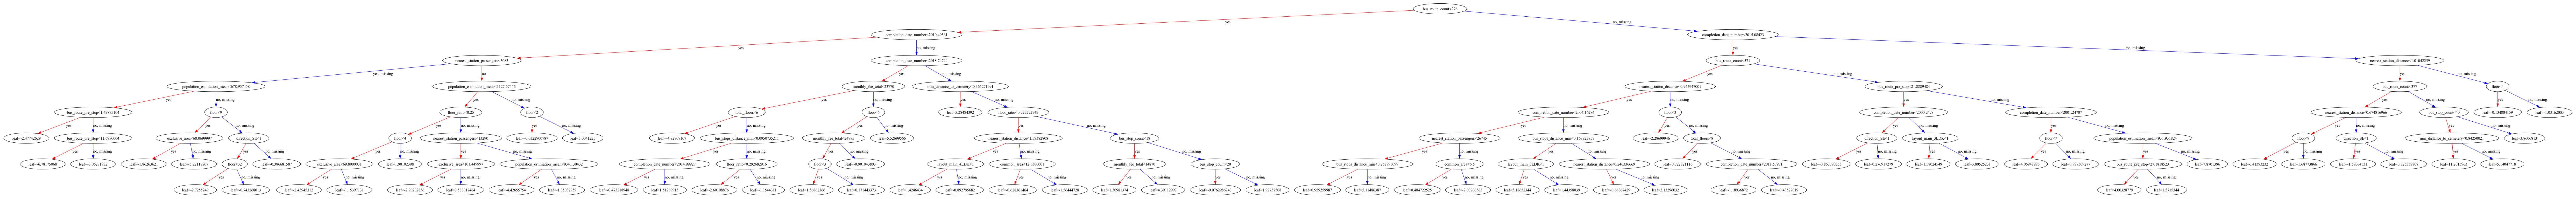

In [8]:
from xgboost import plot_tree
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [128, 32]
plot_tree(model)
plt.savefig("output/xgboost_model.png")

# Error Analysis

## Error Visualization for unit price

Mu=-0.001551668694451277 Std=4.783297806061817


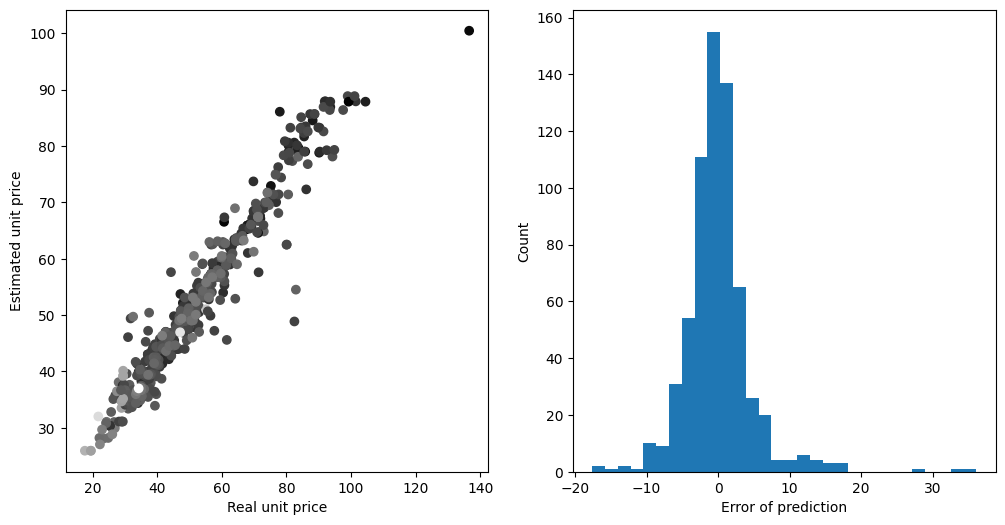

In [9]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 6))
[ax1, ax2] = fig.subplots(1, 2)
_ = ax1.scatter(df["unit_price"], df["unit_price_estimate"], c=df["exclusive_area"], cmap="gray")
ax1.set_xlabel("Real unit price")
ax1.set_ylabel("Estimated unit price")
unit_price_error = df["unit_price"] - df["unit_price_estimate"]
_ = ax2.hist(unit_price_error, bins=30)
ax2.set_xlabel("Error of prediction")
ax2.set_ylabel("Count")
print(f"Mu={unit_price_error.to_numpy().mean()} Std={unit_price_error.to_numpy().std()}")

## Error Analysis for Total Price

Mu=-16.306150620749076 Std=393.3825505296973


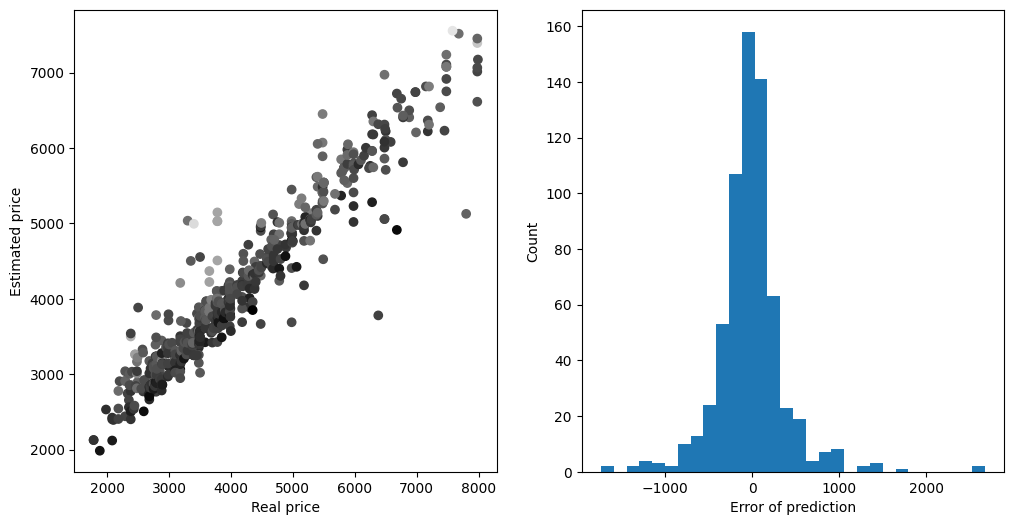

In [10]:
fig = plt.figure(figsize=(12, 6))
[ax1, ax2] = fig.subplots(1, 2)
_ = ax1.scatter(df["price"], df["price_estimate"], c=df["exclusive_area"], cmap="gray")
ax1.set_xlabel("Real price")
ax1.set_ylabel("Estimated price")
price_error = df["price"] - df["price_estimate"]
_ = ax2.hist(price_error, bins=30)
ax2.set_xlabel("Error of prediction")
ax2.set_ylabel("Count")
print(f"Mu={price_error.to_numpy().mean()} Std={price_error.to_numpy().std()}")

## Distribution for CP value

CP value is the ration between estimated price and real price.
It assumes that the model's predictions are fundamentally accurate, and that the prediction errors come from different sellers' psychological expectations.

When we have a model that also works well on the test set, we can use CP Value to estimate the profit margin.

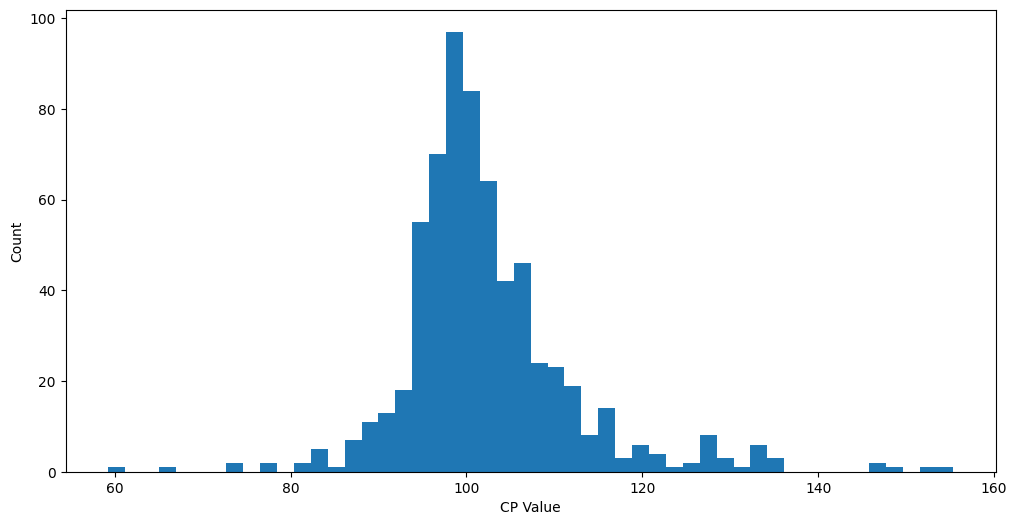

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]
df["cp_value"] = df["price_estimate"] * 100.0 / df["price"]
plt.hist(df["cp_value"], bins=50)
plt.xlabel("CP Value")
_ = plt.ylabel("Count")

# Save The Result

Save the result to CSV file and order by CP value desc.

In [12]:
df.sort_values(by=["cp_value"], ascending=False).to_csv("data/result-xgb.csv", index=False)